# Q2.1

1. Use `matplotlib` to show scatterplots of each variable

In [238]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv

# you can also use pandas to load the data
data = pd.read_csv('happiness.csv')

In [239]:

colnames = pd.read_csv('happiness.csv', nrows=1).columns.tolist()
print(colnames)

['country', 'happiness_rank', 'happiness_score', 'economy', 'family', 'health', 'freedom', 'generosity', 'corruption', 'dystopia_residual', 'internet_access_population[%]', 'cellular_subscriptions', 'surplus_deficit_GDP[%]', 'familiy_income_gini_coeff', 'GDP_per_capita[$]', 'inflation_rate[%]', 'military_expenditures[%]', 'map_reference', 'biggest_official_language', 'population']


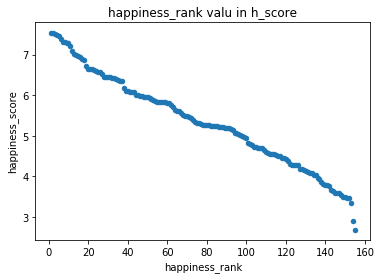

In [241]:
#x = data.iloc[:, 1]
#y = data.iloc[:, 2] can do with iloc
#plt.scatter(x,y)
data.plot.scatter(x='happiness_rank', y='happiness_score', title="happiness_rank valu in h_score")
plt.show()



#trend:
the above plot clearly show the linear trend h_score and h_rank are dependent with each other

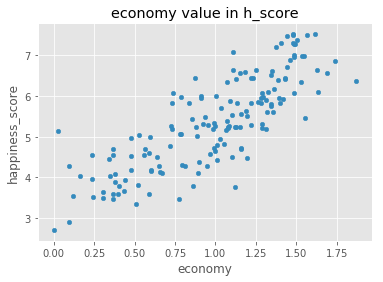

In [133]:
data.plot.scatter(x='economy', y='happiness_score', title="economy value in h_score")
plt.show()

Trend:Clear linear growing trend with significant potential bias from the trendline.

Very probably important, though outliers may cause issues.

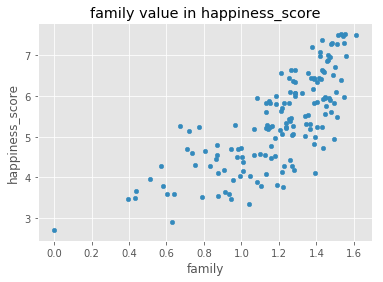

In [136]:
data.plot.scatter(x='family', y='happiness_score', title="family value in happiness_score")
plt.show()

Trend:probably shows linear trend.

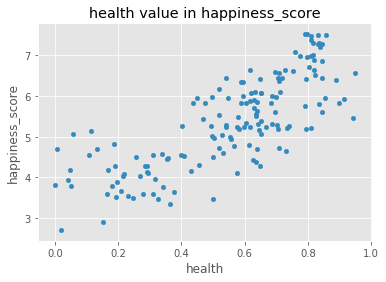

In [137]:
data.plot.scatter(x='health', y='happiness_score', title="health value in happiness_score")
plt.show()

Trend: could be quadratic usefull for high happiness_score

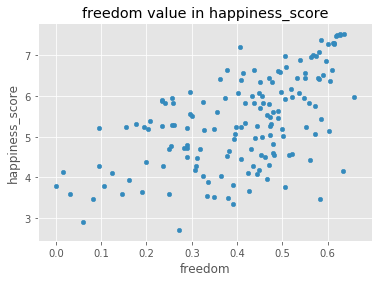

In [138]:
data.plot.scatter(x='freedom', y='happiness_score', title="freedom value in happiness_score")
plt.show()

Trend:it shows linear trend well having low freedom shows less h_score

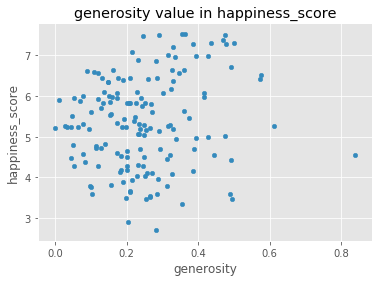

In [139]:
data.plot.scatter(x='generosity', y='happiness_score', title="generosity value in happiness_score")
plt.show()

probably it shows exponential trend 

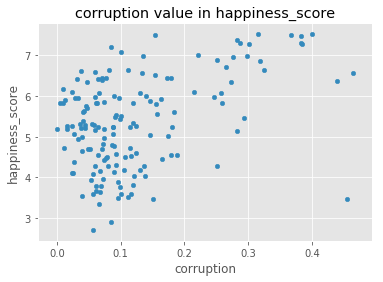

In [140]:
data.plot.scatter(x='corruption', y='happiness_score', title="corruption value in happiness_score")
plt.show()

their is probably linear relation between h_score an cooruption,while corruption high their is h_score more 

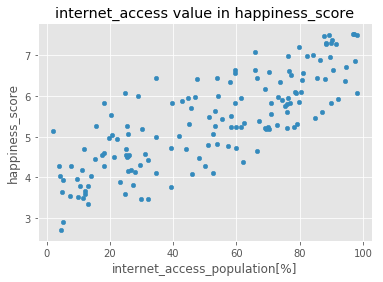

In [154]:
data.plot.scatter(x='internet_access_population[%]', y='happiness_score', title="internet_access value in happiness_score")
plt.show()

their is clear linear trend between h_score and internet_access.

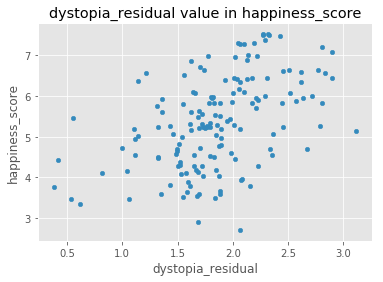

In [141]:
data.plot.scatter(x='dystopia_residual', y='happiness_score', title="dystopia_residual value in happiness_score")
plt.show()

in this plot the quadratic trend shown

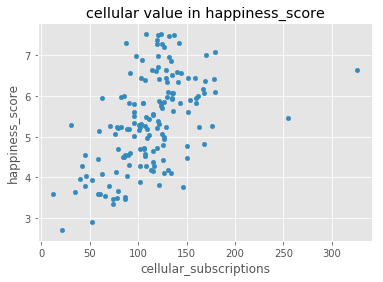

In [143]:
data.plot.scatter(x='cellular_subscriptions', y='happiness_score', title="cellular value in happiness_score")
plt.show()

it probaly shows linear trend

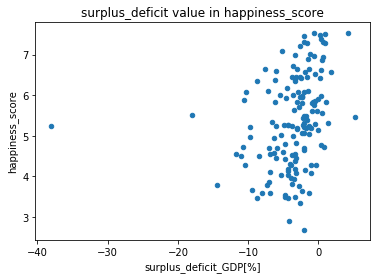

In [221]:
data.plot.scatter(x='surplus_deficit_GDP[%]', y='happiness_score', title="surplus_deficit value in happiness_score")
plt.show()

thier it shows a quadratic trend

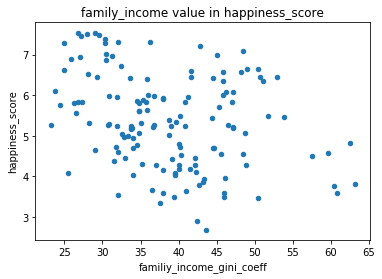

In [220]:
data.plot.scatter(x='familiy_income_gini_coeff', y='happiness_score', title="family_income value in happiness_score")
plt.show()

could be a quadratic trend

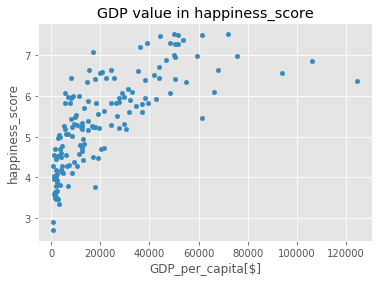

In [149]:
data.plot.scatter(x='GDP_per_capita[$]', y='happiness_score', title="GDP value in happiness_score")
plt.show()

Low GDP suggest logarithmic trend, but this trend rapidly disappears as the distance increases.

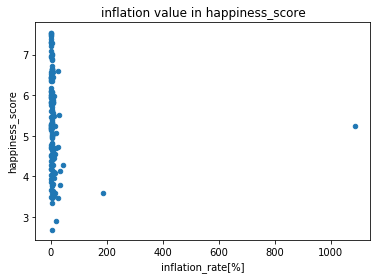

In [101]:
data.plot.scatter(x='inflation_rate[%]', y='happiness_score', title="inflation value in happiness_score")
plt.show()

 no clear trend.

Probably useless as there is no hint of a trend.

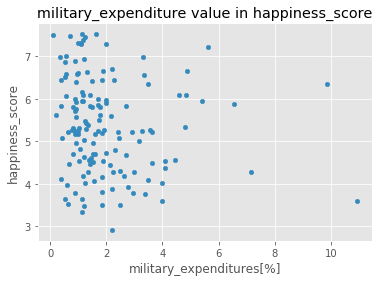

In [151]:
data.plot.scatter(x='military_expenditures[%]', y='happiness_score', title="military_expenditure value in happiness_score")
plt.show()

could be quadratic trend

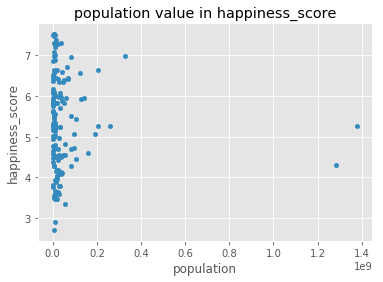

In [153]:
data.plot.scatter(x='population', y='happiness_score', title="population value in happiness_score")
plt.show()

no trend is shown clear here

IMPORTANT FACTORS:
Reasons moastly discussed at individual discription,the most clear factors that should give reasonably good result with the data is Happiness_rank,economy,family,freedom,internet access population
slightly less usefull that can moastly be used for excluding score would be military_expenditure,gdp,family_income,surplus_deficit,cellular value,generocity
probably useless are population,inflation,

# Q2.2

Load data and set up packages

In [252]:
import numpy as np
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import metrics
#from sklearn.preprocessing import Imputer

data = pd.read_csv('happiness.csv')


le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
#x = preprocessing.scale(data.iloc[:, 3:18])
#y = preprocessing.scale(data.iloc[:, 2])

normalizer = Normalizer().fit(data)
data = normalizer.transform(data)
print(data)
#print(x.shape)

[[0.22205601 0.         0.3202731  ... 0.01067577 0.02135154 0.08327101]
 [0.08238308 0.00222657 0.33175888 ... 0.01113285 0.04230482 0.0957425 ]
 [0.12578859 0.00441363 0.32660897 ... 0.00220682 0.07282497 0.        ]
 ...
 [0.44110763 0.49300265 0.00648688 ... 0.         0.12973754 0.41516012]
 [0.08890068 0.61826383 0.00404094 ... 0.         0.15759666 0.31115238]
 [0.09235783 0.54704252 0.         ... 0.         0.09235783 0.15629786]]


In [244]:
missing_values = ["n/a", "na", "--"]
data = pd.read_csv("happiness.csv", na_values=missing_values)
print(data.isnull().sum())


country                           0
happiness_rank                    0
happiness_score                   0
economy                           0
family                            0
health                            0
freedom                           0
generosity                        0
corruption                        0
dystopia_residual                 0
internet_access_population[%]     3
cellular_subscriptions            0
surplus_deficit_GDP[%]            0
familiy_income_gini_coeff        14
GDP_per_capita[$]                 1
inflation_rate[%]                 0
military_expenditures[%]         15
map_reference                     0
biggest_official_language         0
population                        0
dtype: int64


In [246]:
#data.familiy_income_gini_coeff.head()
data['familiy_income_gini_coeff'].fillna(((data['familiy_income_gini_coeff'].mean())), inplace = True)
data['military_expenditures[%]'].fillna(((data['military_expenditures[%]'].mean())), inplace = True)
data['internet_access_population[%]'].fillna(((data['internet_access_population[%]'].mean())), inplace = True)



dataset have missing values,above values is showing in which feature how many missing values was their.

Check the dataset for missing values and, if any are found, address them programmatically

In [289]:
data = pd.read_csv('happiness.csv')
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
x = preprocessing.scale(data.iloc[:, 3:18].values)
y = preprocessing.scale(data.iloc[:, 2].values)

normalizer = Normalizer().fit(data)
data = normalizer.transform(data)
print(data)


[[0.22205601 0.         0.3202731  ... 0.01067577 0.02135154 0.08327101]
 [0.08238308 0.00222657 0.33175888 ... 0.01113285 0.04230482 0.0957425 ]
 [0.12578859 0.00441363 0.32660897 ... 0.00220682 0.07282497 0.        ]
 ...
 [0.44110763 0.49300265 0.00648688 ... 0.         0.12973754 0.41516012]
 [0.08890068 0.61826383 0.00404094 ... 0.         0.15759666 0.31115238]
 [0.09235783 0.54704252 0.         ... 0.         0.09235783 0.15629786]]


C:\Users\Srilu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## Linear model

In [317]:
model1 = KernelRidge(kernel='linear')

#train data
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=0)
#for train_index, test_index in rkf.split(x):
    #print("train index:", train_index, "test_index", test_index)
#    xTrain, xTest = x[train_index], x[test_index]
#    yTrain, yTest = y[train_index], y[test_index]
    
    
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4, random_state = 1) 
#model fitting
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)
lm.score(xTest,yTest)
#ypredictions = lm.fit(xTrain ,yTrain).predict(xTest)


(93, 15)
(62, 15)
(93,)
(62,)


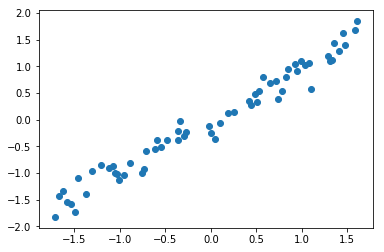

In [324]:
lm = model1
lm.fit(xTrain,yTrain)
ypredictions = lm.predict(xTest)
data = pd.DataFrame({'actual':yTest, 'predicted': ypredictions})
data
plt.scatter(yTest,ypredictions)

In [325]:
#calculating MSE and R2 score
mse_linear = metrics.mean_squared_error(yTest, ypredictions)
print('MSE = ',mse_linear)
score = cross_val_score(model1, x, y, scoring='r2', cv=rkf)
print("cross:", score)
score1 = cross_val_score(model1, x, y, scoring='r2', cv=rkf).mean()
print("r2=", score1)
#score_linear = metrics.r2_score(yTest, ypredictions)
#print('r2 = ', score_linear)


MSE =  0.034685335649298855
cross: [0.95974719 0.96542273 0.94965564 0.95807237 0.93867103]
r2= 0.9543137913170767


the linear model has R2 value 0.954 which is impressive

## Quadratic model

In [293]:
model2 = KernelRidge(kernel = "polynomial", degree=2)
ypredictions_kpolynomial = model2.fit(xTrain,yTrain).predict(xTest)
#plt.scatter(yTest,ypredictions_kpolynomial)
mse_poly = metrics.mean_squared_error(yTest, ypredictions_kpolynomial)
print('MSE poly =', mse_poly)
score = cross_val_score(model2, x, y, cv=rkf, scoring='r2')
print("cross:", score)
score2 = cross_val_score(model2, x, y, cv=rkf, scoring='r2').mean()
print("r2:", score2)



MSE poly = 0.037429573741612314
cross: [0.95618397 0.97013646 0.95583916 0.96259831 0.943982  ]
r2: 0.9577479786097467


{text results here}

## Gaussian model

In [294]:
model3 = KernelRidge(kernel = "rbf", degree=1)
ypredictions_rbf = model3.fit(xTrain,yTrain).predict(xTest)
#plt.scatter(yTest,ypredictions_rbf)
mse_rbf = metrics.mean_squared_error(yTest, ypredictions_rbf)
print('MSE rbf =', mse_rbf)
score = cross_val_score(model3, x, y, cv=rkf, scoring='r2')
print("cross:", score)
score3 = cross_val_score(model3, x, y, cv=rkf, scoring='r2').mean()
print("cross:", score3)


MSE rbf = 0.09504262818613479
cross: [0.90468855 0.91405417 0.89591381 0.92238792 0.88106397]
cross: 0.9036216847196451


the R2score is 0.903 prettymuch equal to all models

## Comparison

where as R2 score are pretty much similar,where as linear model is best fit preferable while MSE are taken into consideration 